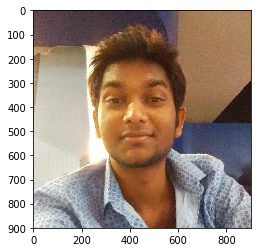

In [20]:
# Template Matching 


import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

full = cv2.imread('images/img.jpg')

#type(full)

full = cv2.cvtColor(full,cv2.COLOR_BGR2RGB)

plt.imshow(full)




In [21]:
full.shape

(900, 900, 3)

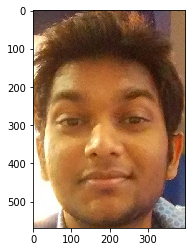

In [22]:
face = cv2.imread('images/face.jpg')
face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)
plt.imshow(face)

In [23]:
face.shape

(569, 398, 3)

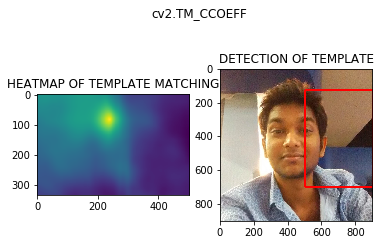

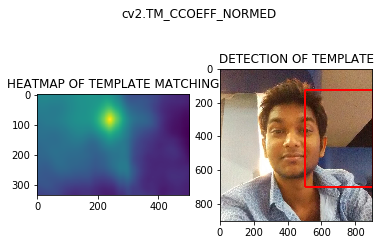

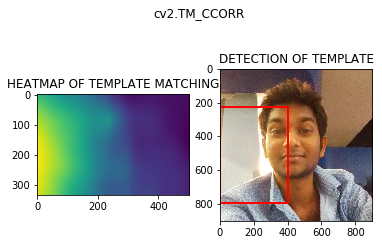

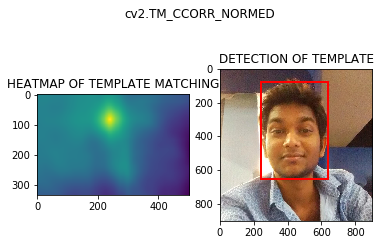

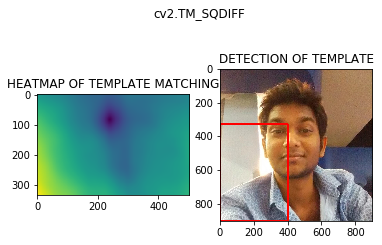

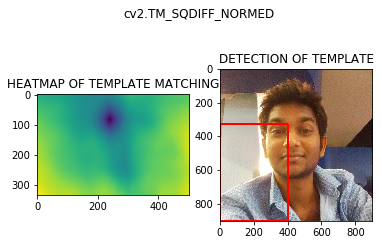

In [24]:
# All the 6 Methods for comparison in a list
# Note we are using strings, later we will use eval() to convert to fucntion
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for m in methods:
    
    # Create a copy
    full_copy = full.copy()
    method = eval(m)
    
    # Template matching
    res = cv2.matchTemplate(full_copy,face,method)
    
    min_val,max_value,min_loc,max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_CCOEFF,cv2.TM_CCOEFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
        
    height,width,channels = face.shape
    
    bottom_right = (top_left[0] + width, top_left[1] + height)

    cv2.rectangle(full_copy,top_left,bottom_right,(255,0,0),10)
    
    # plot and show the images
    
    plt.subplot(121)
    plt.imshow(res)
    plt.title("HEATMAP OF TEMPLATE MATCHING")
    
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title("DETECTION OF TEMPLATE")
    
    # Title with the method used
    plt.suptitle(m)
    
    plt.show()
    
    print("\n")
    print("\n")
